In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\okial\AppData\Local\Temp\ipykernel_4488\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_excel("../Dataset/sleep_dataset_enhanced.xlsx")
df.head()

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,African elephant,Loxodonta,Proboscidea,Elephantidae,herbi,vu,6654.000,5712.0,3.3,20.7,NaN,NaN,38.6,645.0,3.0,5.0,3.0
1,African giant pouched rat,Cricetomys,Rodentia,Nesomyidae,omni,lc,1.000,6.6,8.3,15.7,6.3,2.0,4.5,42.0,3.0,1.0,3.0
2,African striped mouse,Rhabdomys,Rodentia,Muridae,omni,lc,0.044,0.0,8.7,15.3,NaN,NaN,2.0,23.0,NaN,NaN,NaN
3,Arctic fox,Vulpes,Carnivora,Canidae,carni,lc,3.380,44.5,12.5,11.5,NaN,NaN,14.0,60.0,1.0,1.0,1.0
4,Arctic ground squirrel,Spermophilus,Rodentia,Sciuridae,herbi,lc,0.920,5.7,16.6,7.4,NaN,NaN,11.0,25.0,5.0,2.0,3.0


In [3]:
len(df)
# 87 rows

87

In [4]:
df.describe()

# Min BrainWt 0.0 ???
# Visible Outliers

,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
count,87.000000,87.000000,87.000000,87.000000,47.000000,63.000000,87.000000,87.000000,58.000000,58.000000,58.000000
mean,161.384310,196.405287,10.608046,13.393103,8.736170,1.979365,17.275862,129.362069,2.844828,2.362069,2.586207
std,768.846727,793.628150,4.465793,4.467481,3.679522,1.474204,17.787590,137.010772,1.496214,1.575005,1.426989
min,0.005000,0.000000,1.900000,4.100000,2.100000,0.100000,2.000000,11.000000,1.000000,1.000000,1.000000
25%,0.202500,0.000000,8.150000,10.250000,6.300000,0.900000,3.700000,30.000000,2.000000,1.000000,1.000000
50%,2.000000,5.500000,10.300000,13.700000,8.400000,1.800000,12.000000,68.000000,3.000000,2.000000,2.000000
75%,43.165000,64.000000,13.750000,15.850000,11.000000,2.500000,24.500000,180.000000,4.000000,4.000000,4.000000
max,6654.000000,5712.000000,19.900000,22.100000,17.900000,6.600000,100.000000,645.000000,5.000000,5.000000,5.000000


In [5]:
df.isna().sum()
# Many columns with missing values

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming        24
LifeSpan         0
Gestation        0
Predation       29
Exposure        29
Danger          29
dtype: int64

In [6]:
df.Family.value_counts()

# Every species is unique in the data

Family
Cricetidae          7
Sciuridae           5
Felidae             5
Muridae             4
Canidae             4
Cercopithecidae     4
Bovidae             3
Didelphidae         3
Soricidae           3
Procaviidae         3
Hominidae           3
Lorisidae           2
Talpidae            2
Equidae             2
Erinaceidae         2
Elephantidae        2
Phocidae            2
Delphinidae         2
Vespertilionidae    2
Tachyglossidae      1
Cebidae             1
Tenrecidae          1
Cervidae            1
Procyonidae         1
Leporidae           1
Bradypodidae        1
Potoroidae          1
Suidae              1
Phalangeridae       1
Aotidae             1
Otariidae           1
Giraffidae          1
Aplodontia          1
Lemuridae           1
Spalacidae          1
Dasypodidae         1
Caviidae            1
Nesomyidae          1
Chlamyphoridae      1
Viverridae          1
Galagidae           1
Octodontidae        1
Phocoena            1
Chinchillidae       1
Tapiridae           1
Tup

In [7]:
df.Genus.value_counts()

Genus
Spermophilus    3
Panthera        3
Equus           2
Vulpes          2
Canis           2
               ..
Priodontes      1
Genetta         1
Galago          1
Erinaceus       1
Eutamias        1
Name: count, Length: 80, dtype: int64

In [8]:
df.Order.value_counts()

Order
Rodentia           22
Carnivora          14
Primates           13
Artiodactyla        6
Soricomorpha        5
Hyracoidea          3
Cetacea             3
Perissodactyla      3
Didelphimorphia     3
Diprotodontia       2
Proboscidea         2
Cingulata           2
Erinaceomorpha      2
Chiroptera          2
Lagomorpha          1
Monotremata         1
Afrosoricida        1
Pilosa              1
Scandentia          1
Name: count, dtype: int64

In [9]:
df.Vore.value_counts()
# The model will have a hard time predicting values for insectivores

Vore
herbi      37
carni      22
omni       20
insecti     8
Name: count, dtype: int64

In [10]:
df.Conservation.value_counts()
# vu: Vulnerable
# lc: Least Concern
# en: Endangered
# domesticated: Domesticated (typically referring to species that have been bred and kept by humans)
# cd: Critically Endangered
# nt: Near Threatened
# cr: Critically Endangered

Conservation
lc              50
domesticated    10
vu               9
en               8
nt               7
cd               2
cr               1
Name: count, dtype: int64

In [11]:
df.loc[df.Conservation.isna()]

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger


<Axes: xlabel='Vore', ylabel='Count'>

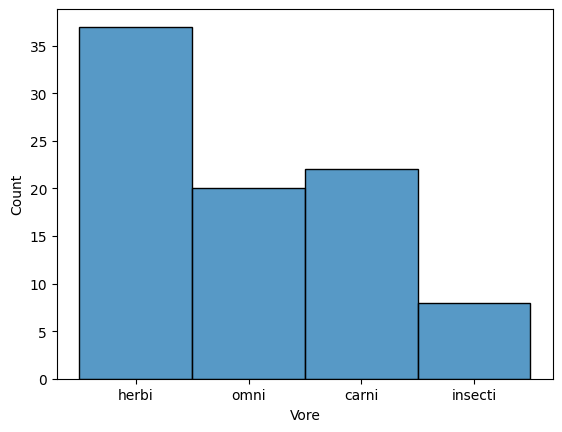

In [12]:
sns.histplot(df,x="Vore")

<Axes: xlabel='BodyWt'>

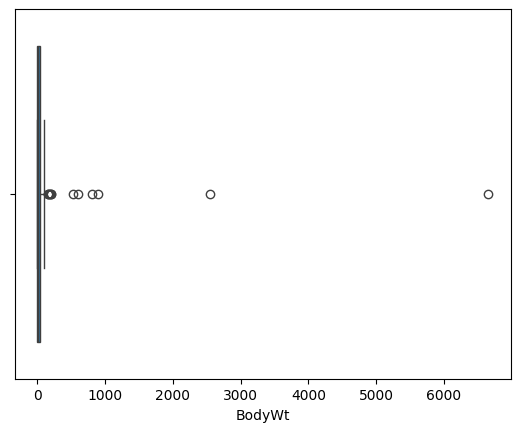

In [13]:
sns.boxplot(df,x="BodyWt")
# Some outliers
# Highly asymmetrical distribution - Use of a logarithm transformation ?

<Axes: ylabel='BodyWt'>

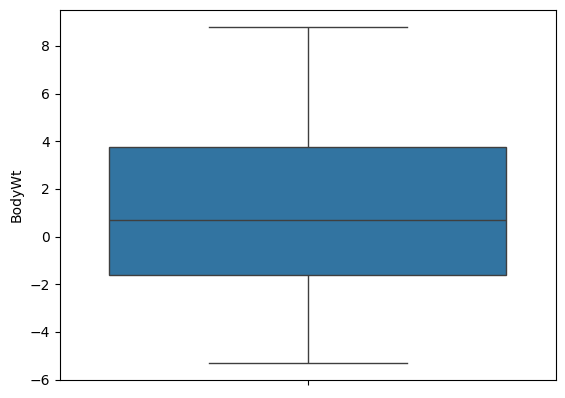

In [14]:
sns.boxplot(np.log(df.BodyWt))
# with a logarithm scale
# better, we can use this 

<Axes: xlabel='BrainWt'>

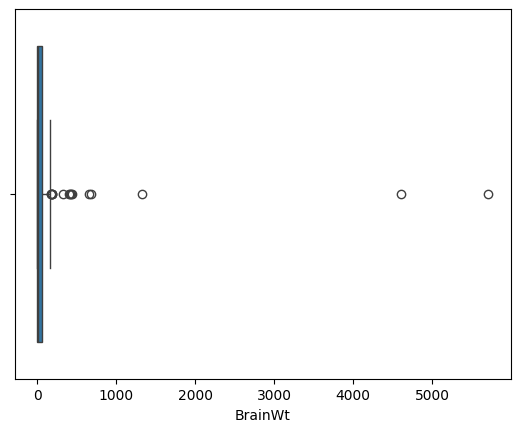

In [15]:
sns.boxplot(df,x="BrainWt")
# Some outliers also
# Are the two of them correlated ?
# Impossible to use the logarithm tranformation due to null values

<Axes: xlabel='BodyWt', ylabel='BrainWt'>

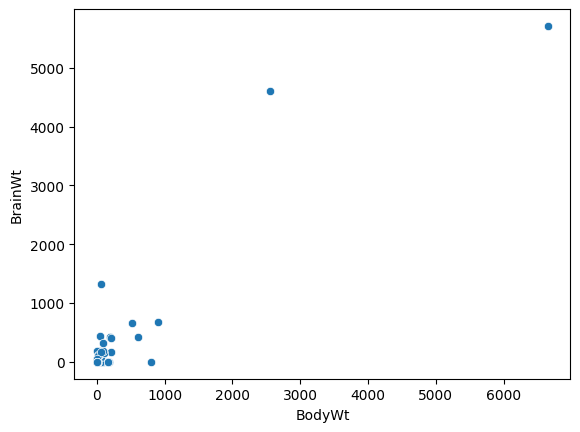

In [16]:
sns.scatterplot(data=df,x="BodyWt",y="BrainWt")
# 2 extreme points. What are they ?

In [17]:
df.loc[df.BodyWt > 1000]
# What about the ratio BodyWt / BrainWt ?

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,African elephant,Loxodonta,Proboscidea,Elephantidae,herbi,vu,6654.0,5712.0,3.3,20.7,NaN,NaN,38.6,645.0,3.0,5.0,3.0
5,Asian elephant,Elephas,Proboscidea,Elephantidae,herbi,en,2547.0,4603.0,3.9,20.1,2.1,1.8,69.0,624.0,3.0,5.0,4.0


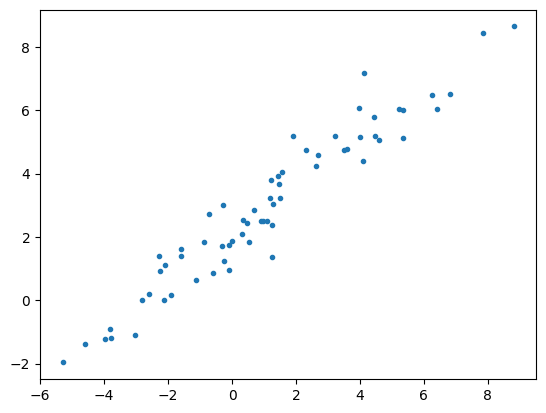

In [18]:
df_FullBrain = df.loc[df.BrainWt > 0]
BodyWt_log = np.log(df_FullBrain.BodyWt)
BrainWt_log = np.log(df_FullBrain.BrainWt)
plt.plot(BodyWt_log,BrainWt_log,'.')
plt.show()

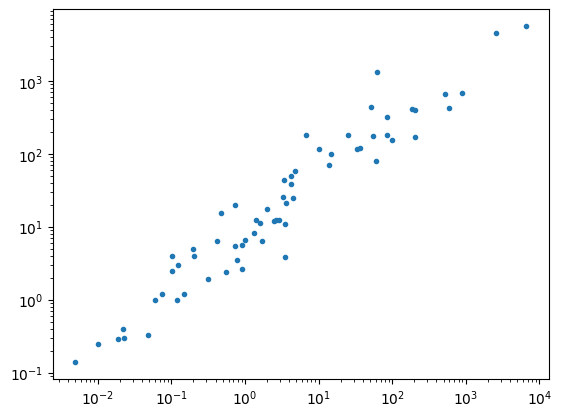

In [19]:
plt.plot(df_FullBrain.BodyWt,df_FullBrain.BrainWt,'.')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [20]:
df.BodyWt / df.BrainWt

0     1.164916
1     0.151515
2          inf
3     0.075955
4     0.161404
        ...   
82    0.081897
83         inf
84         inf
85    0.897436
86         inf
Length: 87, dtype: float64

<Axes: ylabel='Count'>

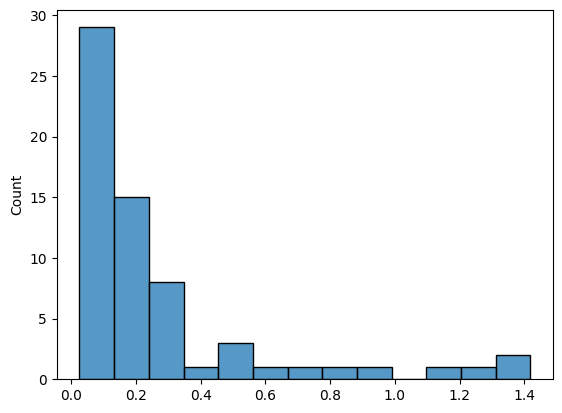

In [21]:
sns.histplot(data= df.BodyWt / df.BrainWt)

# Should we this value ?
# Interesting but unusable due to some BrainWt = 0 

In [22]:
len(df.loc[df.BrainWt == 0])
# 23 rows with null values
# What means this zeros and what will we do with them?

23

<Axes: xlabel='Awake', ylabel='Count'>

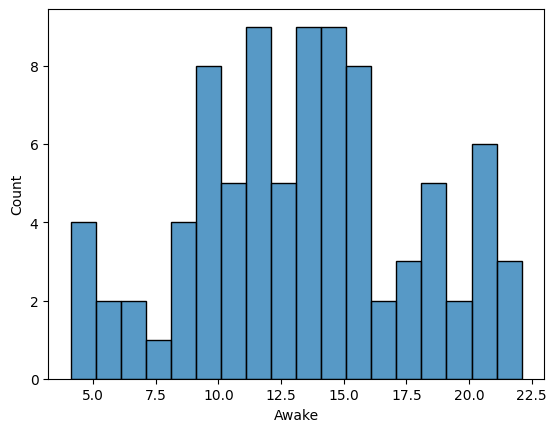

In [23]:
sns.histplot(df,x="Awake",binwidth=1)

<Axes: xlabel='LifeSpan'>

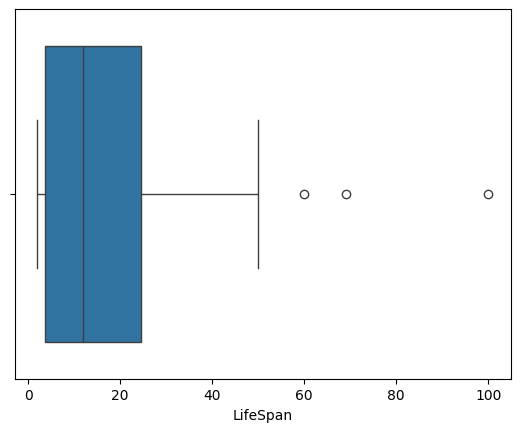

In [24]:
sns.boxplot(df,x="LifeSpan")
# 2 outliers

In [25]:
df.loc[df.LifeSpan > 60]

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
5,Asian elephant,Elephas,Proboscidea,Elephantidae,herbi,en,2547.0,4603.0,3.9,20.1,2.1,1.8,69.0,624.0,3.0,5.0,4.0
41,Human,Homo,Primates,Hominidae,omni,lc,62.0,1320.0,8.0,16.0,6.1,1.9,100.0,267.0,1.0,1.0,1.0


In [26]:
df.loc[(df.LifeSpan.isna()) | (df.Gestation.isna())]
# 33 missing values
# Same as Gestation with the exception of 3 examples

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger


<Axes: xlabel='Gestation', ylabel='Count'>

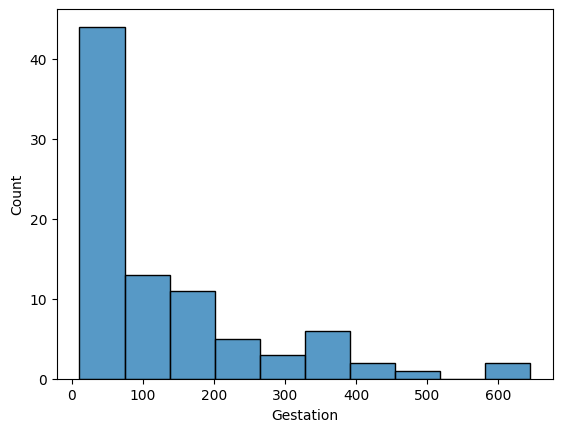

In [27]:
sns.histplot(df,x="Gestation")

In [28]:
df.Predation.value_counts()

Predation
1.0    14
2.0    14
5.0    13
3.0    10
4.0     7
Name: count, dtype: int64

In [29]:
df.Exposure.value_counts()

Exposure
1.0    26
2.0    12
5.0    11
4.0     5
3.0     4
Name: count, dtype: int64

In [30]:
df.Danger.value_counts()

Danger
1.0    18
2.0    13
3.0    10
4.0     9
5.0     8
Name: count, dtype: int64

In [31]:
df.loc[df.Danger.isna()]
# Same missing values as Predation and Exposure

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
2,African striped mouse,Rhabdomys,Rodentia,Muridae,omni,lc,0.044,0.00,8.7,15.30,NaN,NaN,2.0,23.0,NaN,NaN,NaN
8,Bottle-nosed dolphin,Tursiops,Cetacea,Delphinidae,carni,lc,173.330,0.00,5.2,18.80,NaN,NaN,50.0,365.0,NaN,NaN,NaN
10,Caspian seal,Phoca,Carnivora,Phocidae,carni,vu,86.000,0.00,3.5,20.50,NaN,0.4,50.0,334.0,NaN,NaN,NaN
11,Cheetah,Acinonyx,Carnivora,Felidae,carni,lc,50.000,0.00,12.1,11.90,NaN,NaN,11.0,92.0,NaN,NaN,NaN
14,Common porpoise,Phocoena,Cetacea,Phocoena,carni,vu,53.180,0.00,5.6,18.45,NaN,NaN,11.0,334.0,NaN,NaN,NaN
15,Cotton rat,Sigmodon,Rodentia,Cricetidae,herbi,lc,0.148,1.18,11.3,12.70,NaN,1.1,2.0,23.0,NaN,NaN,NaN
17,Deer mouse,Peromyscus,Rodentia,Cricetidae,herbi,nt,0.021,0.00,11.5,12.50,NaN,NaN,2.0,25.0,NaN,NaN,NaN
18,Degu,Octodon,Rodentia,Octodontidae,herbi,lc,0.210,0.00,7.7,16.30,NaN,0.9,2.0,90.0,NaN,NaN,NaN
20,Dog,Canis,Carnivora,Canidae,carni,domesticated,14.000,70.00,10.1,13.90,NaN,2.9,12.0,77.0,NaN,NaN,NaN
23,Eastern american chipmunk,Tamias,Rodentia,Sciuridae,herbi,lc,0.112,0.00,15.8,8.20,NaN,NaN,3.0,31.0,NaN,NaN,NaN


<Axes: xlabel='Danger', ylabel='Count'>

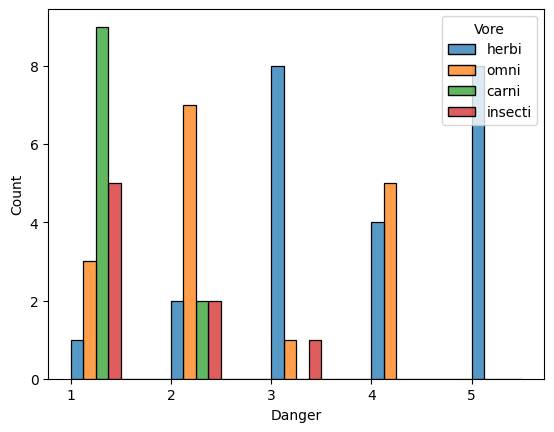

In [55]:
sns.histplot(data=df, x="Danger", hue="Vore", multiple="dodge",binrange=(1,5.5),binwidth=0.5)

<Axes: xlabel='Exposure', ylabel='Count'>

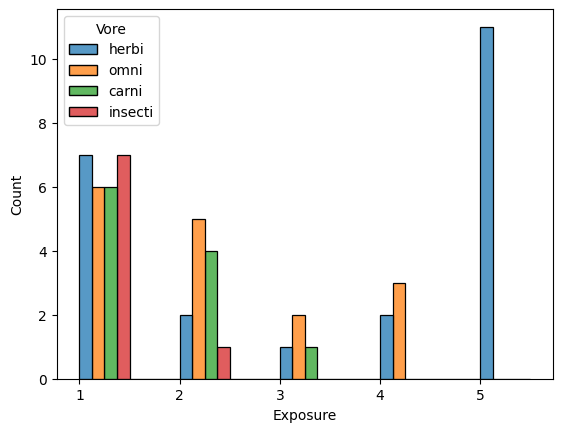

In [56]:
sns.histplot(data=df, x="Exposure", hue="Vore", multiple="dodge",binrange=(1,5.5),binwidth=0.5)

<Axes: xlabel='Predation', ylabel='Count'>

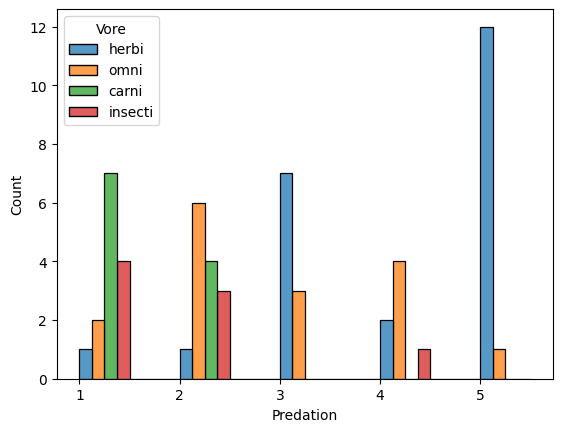

In [57]:
sns.histplot(data=df, x="Predation", hue="Vore", multiple="dodge",binrange=(1,5.5),binwidth=0.5)

In [35]:
df.columns

Index(['Species', 'Genus', 'Order', 'Family', 'Vore', 'Conservation', 'BodyWt',
       'BrainWt', 'TotalSleep', 'Awake', 'NonDreaming', 'Dreaming', 'LifeSpan',
       'Gestation', 'Predation', 'Exposure', 'Danger'],
      dtype='object')

<Axes: >

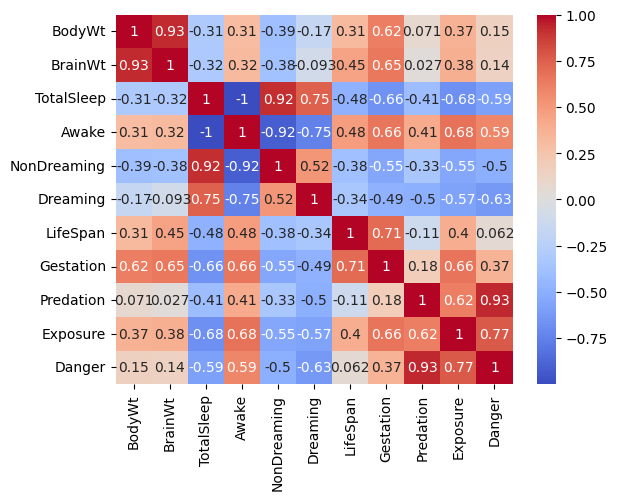

In [36]:
sns.heatmap(df[["BodyWt","BrainWt","TotalSleep",'Awake', 'NonDreaming', 'Dreaming', 'LifeSpan',
       'Gestation', 'Predation', 'Exposure', 'Danger']].corr(),annot=True,cmap='coolwarm')
# Unexpected correlations between
# BrainWt and Gestation
# Awake and Exposure
# Dreaming and Danger
# Gestation and Exposure....

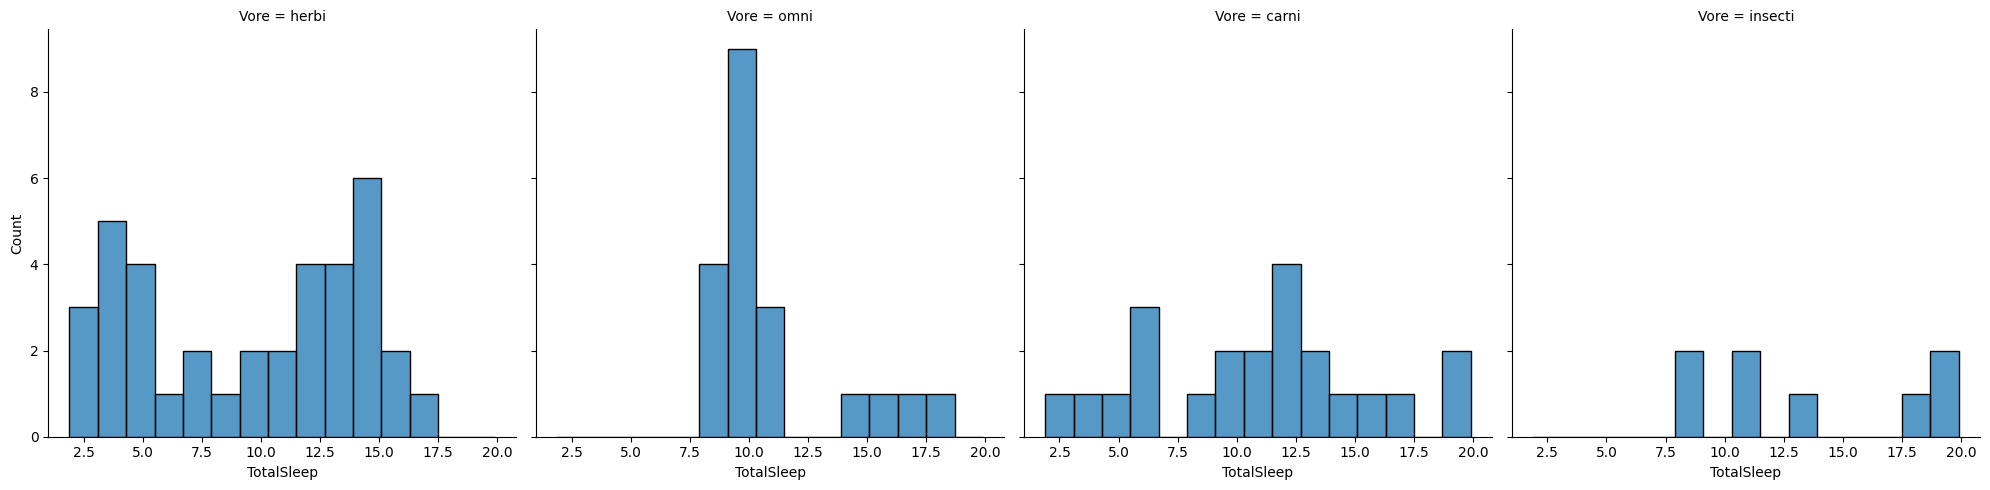

In [37]:
sns.displot(df,x="TotalSleep",col="Vore",bins=15)

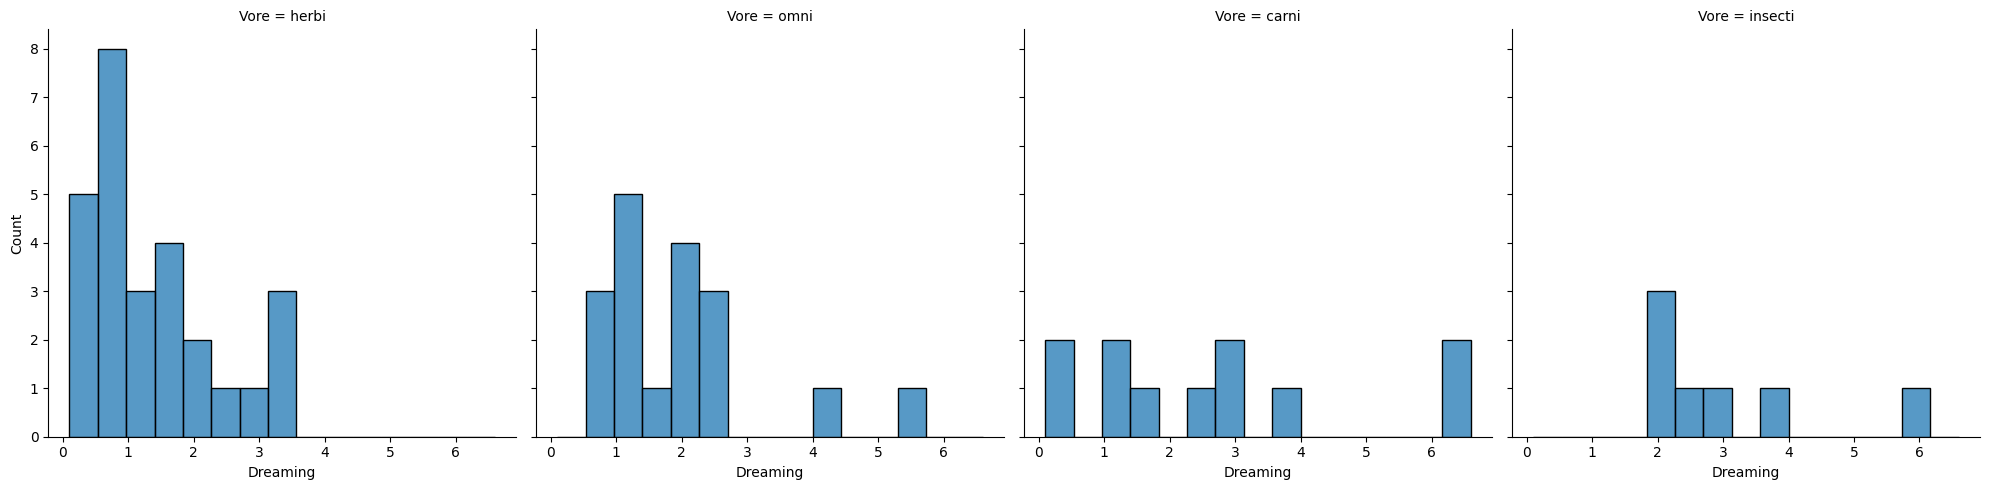

In [38]:
sns.displot(df,x="Dreaming",col="Vore",bins=15)

<Axes: xlabel='TotalSleep', ylabel='Dreaming'>

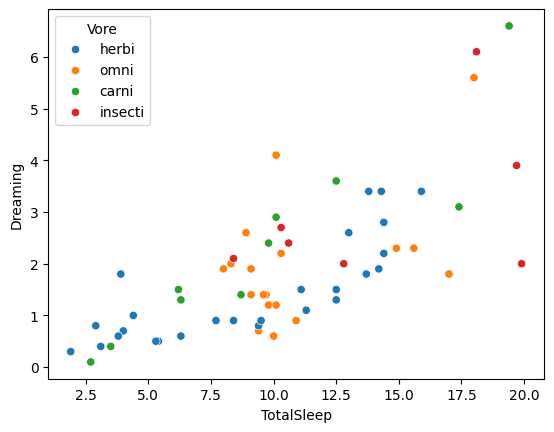

In [39]:
sns.scatterplot(df,x="TotalSleep",y="Dreaming",hue="Vore")

<Axes: xlabel='TotalSleep', ylabel='Exposure'>

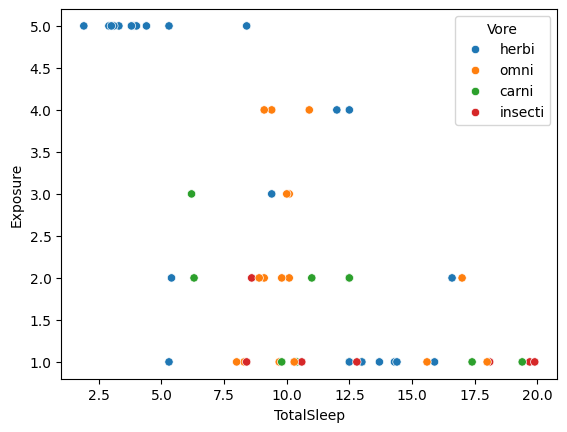

In [40]:
sns.scatterplot(df,x="TotalSleep",y="Exposure",hue="Vore")

<Axes: xlabel='TotalSleep', ylabel='Gestation'>

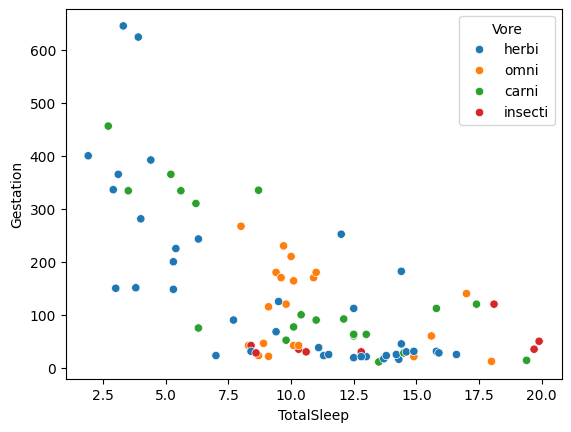

In [41]:
sns.scatterplot(df,x="TotalSleep",y="Gestation",hue="Vore")

In [67]:
df.dtypes

Species          object
Genus            object
Order            object
Family           object
Vore             object
Conservation     object
BodyWt          float64
BrainWt         float64
TotalSleep      float64
Awake           float64
NonDreaming     float64
Dreaming        float64
LifeSpan        float64
Gestation       float64
Predation       float64
Exposure        float64
Danger          float64
dtype: object

In [74]:
df.mode(numeric_only = True)

,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,1.1,0.0,12.5,11.5,11.0,0.9,2.0,23.0,1.0,1.0,1.0
1,3.5,NaN,NaN,NaN,NaN,1.4,NaN,42.0,2.0,NaN,NaN


In [113]:
df[['Vore','Predation','Exposure','Danger']].groupby(['Vore']).median().astype(int)

,Predation,Exposure,Danger
Vore,,,
carni,1,1,1
herbi,5,4,4
insecti,1,1,1
omni,2,2,2


In [114]:
median_attributes = df[['Vore','Predation','Exposure','Danger']].groupby(['Vore']).median().astype(int).to_dict('split')

In [115]:
median_attributes

{'index': ['carni', 'herbi', 'insecti', 'omni'],
 'columns': ['Predation', 'Exposure', 'Danger'],
 'data': [[1, 1, 1], [5, 4, 4], [1, 1, 1], [2, 2, 2]]}

In [116]:
median_attributes['data'][2]

[1, 1, 1]

In [117]:
temp_df.loc[temp_df.Vore == 'insecti',['Predation','Exposure','Danger']]

,Predation,Exposure,Danger


In [123]:
temp_df = df.loc[df.Predation.isna()]
i = 0
for vore in median_attributes['index']:
    temp_df.loc[temp_df.Vore == vore,['Predation','Exposure','Danger']] = median_attributes['data'][i]
    i += 1

df.loc[df.Predation.isna(),['Predation','Exposure','Danger']] = temp_df[['Predation','Exposure','Danger']]
df.isna().sum()

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming        24
LifeSpan         0
Gestation        0
Predation        0
Exposure         0
Danger           0
dtype: int64

In [42]:
fullday =  df.Awake + df.TotalSleep
fullday.value_counts()
# 2 strange values

24.00    85
24.05     1
24.05     1
Name: count, dtype: int64

In [43]:
df.loc[df.NonDreaming.isna(),["TotalSleep","NonDreaming","Dreaming"]]

,TotalSleep,NonDreaming,Dreaming
0,3.3,NaN,NaN
2,8.7,NaN,NaN
3,12.5,NaN,NaN
4,16.6,NaN,NaN
8,5.2,NaN,NaN
10,3.5,NaN,0.4
11,12.1,NaN,NaN
14,5.6,NaN,NaN
15,11.3,NaN,1.1
17,11.5,NaN,NaN


In [44]:
df_mod = df.copy()

In [45]:
df_mod["SleepComputed"] = df_mod.NonDreaming + df_mod.Dreaming
df_mod.loc[df_mod.NonDreaming > 0,["TotalSleep","SleepComputed","NonDreaming","Dreaming"]]
# Discrepancy in the data TotalSleep <> Dreaming + NonDreaming (SleepComputed)

,TotalSleep,SleepComputed,NonDreaming,Dreaming
1,8.3,8.3,6.3,2.0
5,3.9,3.9,2.1,1.8
6,9.4,9.8,9.1,0.7
7,19.7,19.7,15.8,3.9
9,4.4,6.2,5.2,1.0
12,9.7,9.7,8.3,1.4
13,12.5,12.5,11.0,1.5
16,4.0,3.9,3.2,0.7
19,10.3,10.3,7.6,2.7
21,12.5,14.5,10.9,3.6


In [46]:
NonDreamingtoFill = df_mod.loc[(df_mod.NonDreaming.isna()) & (df_mod.Dreaming > 0),["TotalSleep","NonDreaming","Dreaming"]]
NonDreamingtoFill

,TotalSleep,NonDreaming,Dreaming
10,3.5,NaN,0.4
15,11.3,NaN,1.1
18,7.7,NaN,0.9
20,10.1,NaN,2.9
22,3.1,NaN,0.4
29,1.9,NaN,0.3
34,6.3,NaN,0.6
37,14.9,NaN,2.3
50,14.2,NaN,1.9
51,9.5,NaN,0.9


In [47]:
NonDreamingFilled = NonDreamingtoFill.TotalSleep - NonDreamingtoFill.Dreaming
NonDreamingFilled

10     3.1
15    10.2
18     6.8
20     7.2
22     2.7
29     1.6
34     5.7
37    12.6
50    12.3
51     8.6
55     7.3
61     2.6
62     9.6
73     8.2
76    12.8
77    10.4
78    12.2
dtype: float64

In [48]:
df_mod.isna().sum()

Species           0
Genus             0
Order             0
Family            0
Vore              0
Conservation      0
BodyWt            0
BrainWt           0
TotalSleep        0
Awake             0
NonDreaming      40
Dreaming         24
LifeSpan          0
Gestation         0
Predation        29
Exposure         29
Danger           29
SleepComputed    41
dtype: int64

In [49]:
df_mod.loc[(df_mod.Dreaming.isna()) & (df_mod.NonDreaming > 0),["TotalSleep","NonDreaming","Dreaming"]]

,TotalSleep,NonDreaming,Dreaming
71,8.6,8.6,NaN


In [50]:
df_mod.loc[(df_mod.Dreaming.isna()) & (df_mod.NonDreaming > 0),"Dreaming"] = 0
df_mod.isna().sum()

Species           0
Genus             0
Order             0
Family            0
Vore              0
Conservation      0
BodyWt            0
BrainWt           0
TotalSleep        0
Awake             0
NonDreaming      40
Dreaming         23
LifeSpan          0
Gestation         0
Predation        29
Exposure         29
Danger           29
SleepComputed    41
dtype: int64

In [51]:
df_mod.loc[df_mod.Dreaming.isna()]

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,SleepComputed
0,African elephant,Loxodonta,Proboscidea,Elephantidae,herbi,vu,6654.000,5712.0,3.3,20.70,NaN,NaN,38.6,645.0,3.0,5.0,3.0,NaN
2,African striped mouse,Rhabdomys,Rodentia,Muridae,omni,lc,0.044,0.0,8.7,15.30,NaN,NaN,2.0,23.0,NaN,NaN,NaN,NaN
3,Arctic fox,Vulpes,Carnivora,Canidae,carni,lc,3.380,44.5,12.5,11.50,NaN,NaN,14.0,60.0,1.0,1.0,1.0,NaN
4,Arctic ground squirrel,Spermophilus,Rodentia,Sciuridae,herbi,lc,0.920,5.7,16.6,7.40,NaN,NaN,11.0,25.0,5.0,2.0,3.0,NaN
8,Bottle-nosed dolphin,Tursiops,Cetacea,Delphinidae,carni,lc,173.330,0.0,5.2,18.80,NaN,NaN,50.0,365.0,NaN,NaN,NaN,NaN
11,Cheetah,Acinonyx,Carnivora,Felidae,carni,lc,50.000,0.0,12.1,11.90,NaN,NaN,11.0,92.0,NaN,NaN,NaN,NaN
14,Common porpoise,Phocoena,Cetacea,Phocoena,carni,vu,53.180,0.0,5.6,18.45,NaN,NaN,11.0,334.0,NaN,NaN,NaN,NaN
17,Deer mouse,Peromyscus,Rodentia,Cricetidae,herbi,nt,0.021,0.0,11.5,12.50,NaN,NaN,2.0,25.0,NaN,NaN,NaN,NaN
23,Eastern american chipmunk,Tamias,Rodentia,Sciuridae,herbi,lc,0.112,0.0,15.8,8.20,NaN,NaN,3.0,31.0,NaN,NaN,NaN,NaN
33,Gorilla,Gorilla,Primates,Hominidae,herbi,cr,207.000,406.0,12.0,12.00,NaN,NaN,39.3,252.0,1.0,4.0,1.0,NaN
